
# **COMPUTATIONAL DATA ANALYTICS WITH PYTHON**
### MBAN1

**Ahmed Raza**


## **Notebook Contents**

                     1. Introduction
                     2. Exploratory Data Analysis [EDA]
                     3. Data Visualization
                     4. Reulsts and Insights with Social Implications
                     5. Logistic Regression with confusion matrix and classfication report
                     5. Random Forest Model with confusion matrix and classfication report
    

## Introduction

The objective of this analysis is to explore income parity and fairness concerns within the framework of Diversity, Equity, Inclusion, and Belonging (DEIB). We expect our analysis to uncover systemic disparities driven by racial and gender biases, which often manifest in unequal earning potential across demographic groups. Factors such as occupational opportunities, educational attainment, and societal norms are likely to influence income gaps. By examining these elements, we aim to highlight how historical and structural inequities perpetuate unfairness. The analysis seeks to inform DEIB strategies that address bias, promote equitable opportunities, and foster an inclusive environment for all individuals, regardless of race or gender.

In [34]:
# Pandas for data structures like DataFrames for efficient data manipulation and analysis
import pandas as pd

#For the use of static visualizations such as plots and charts for data exploration
import matplotlib.pyplot as plt

#high-level interface for creating aesthetically pleasing statistical visualizations
import seaborn as sns

#For numerical operations and handling arrays or matrices efficiently
import numpy as np

#Imports the ARIMA model for time series analysis and forecasting
from statsmodels.tsa.arima.model import ARIMA

#Imports a linear regression model for predicting continuous outcomes based on input features
from sklearn.linear_model import LinearRegression

#Facilitates interactive and dynamic visualizations with a simple syntax for quick plotting
import plotly.express as px

#train_test_split to splits data into training and testing sets for model validation
from sklearn.model_selection import train_test_split

#Imports a random forest model for regression tasks, leveraging ensemble learning
from sklearn.ensemble import RandomForestRegressor

#Calculates the mean absolute error to evaluate the accuracy of regression predictions
from sklearn.metrics import mean_absolute_error

#Used for evaluating classification models.
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

#Ensures numerical features (like age, salary)
from sklearn.preprocessing import StandardScaler

#Understanding the influence of variables.
from sklearn.linear_model import LogisticRegression

#Clustering algorithm for unsupervised learning.
from sklearn.cluster import KMeans

#Works well for capturing
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

#K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

# Import accuracy_score
from sklearn.metrics import accuracy_score

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
# Load the adult data
data = pd.read_csv('/content/drive/MyDrive/MBAn/Computational Data Analytics with Python/adult_data.csv', encoding='utf-8')

## EDA: Descriptive Statistics

We will start with exploring our dataset. As per the source, each patient has the following information collected about them:

In [59]:
# Data type and missing values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  int64   
 1   workclass       48842 non-null  category
 2   fnlwgt          48842 non-null  int64   
 3   education       48842 non-null  category
 4   education_num   48842 non-null  int64   
 5   marital_status  48842 non-null  category
 6   occupation      48842 non-null  category
 7   relationship    48842 non-null  category
 8   race            48842 non-null  category
 9   sex             48842 non-null  category
 10  capital_gain    48842 non-null  int64   
 11  capital_loss    48842 non-null  int64   
 12  hours_per_week  48842 non-null  int64   
 13  native_country  48842 non-null  category
 14  income          48842 non-null  category
 15  overtime        48842 non-null  object  
dtypes: category(9), int64(6), object(1)
memory usage: 3.0+ MB


**Process Analysis:**

I use the basic codes to review the data, it is important to use the functions like df.head and df.info as it helps to understand the data in terms of count of number of reviews and columns, understanding the data types and analyse if the data requires cleaning or manipulation based on the null values or missing values in the dataset.

As we analyzed the data information, we had to remove the na from the data and whitespace from the columns, and change the object column to the category for better analysis.

In [60]:
data.dropna(inplace=True)

In [61]:
# Strip whitespace from string columns
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].str.strip()

## EDA: Categorical Data

We identified that most of the categorical columns are all of dtype **object**.

In [40]:
# Convert categorical variables to 'category' dtype
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].astype('category')

In [41]:
data.race.unique()

['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']
Categories (5, object): ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White']

In [42]:
# Display cleaned data info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  int64   
 1   workclass       48842 non-null  category
 2   fnlwgt          48842 non-null  int64   
 3   education       48842 non-null  category
 4   education_num   48842 non-null  int64   
 5   marital_status  48842 non-null  category
 6   occupation      48842 non-null  category
 7   relationship    48842 non-null  category
 8   race            48842 non-null  category
 9   sex             48842 non-null  category
 10  capital_gain    48842 non-null  int64   
 11  capital_loss    48842 non-null  int64   
 12  hours_per_week  48842 non-null  int64   
 13  native_country  48842 non-null  category
 14  income          48842 non-null  category
dtypes: category(9), int64(6)
memory usage: 2.7 MB
None


In [43]:
summary_statistics = data.describe()
print(summary_statistics)

                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [44]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Data Visualization

We will start exploring the data by drawing single vairalbe plots to analyze the data distribution and multi varaible plots to understand the relationships between the variables.

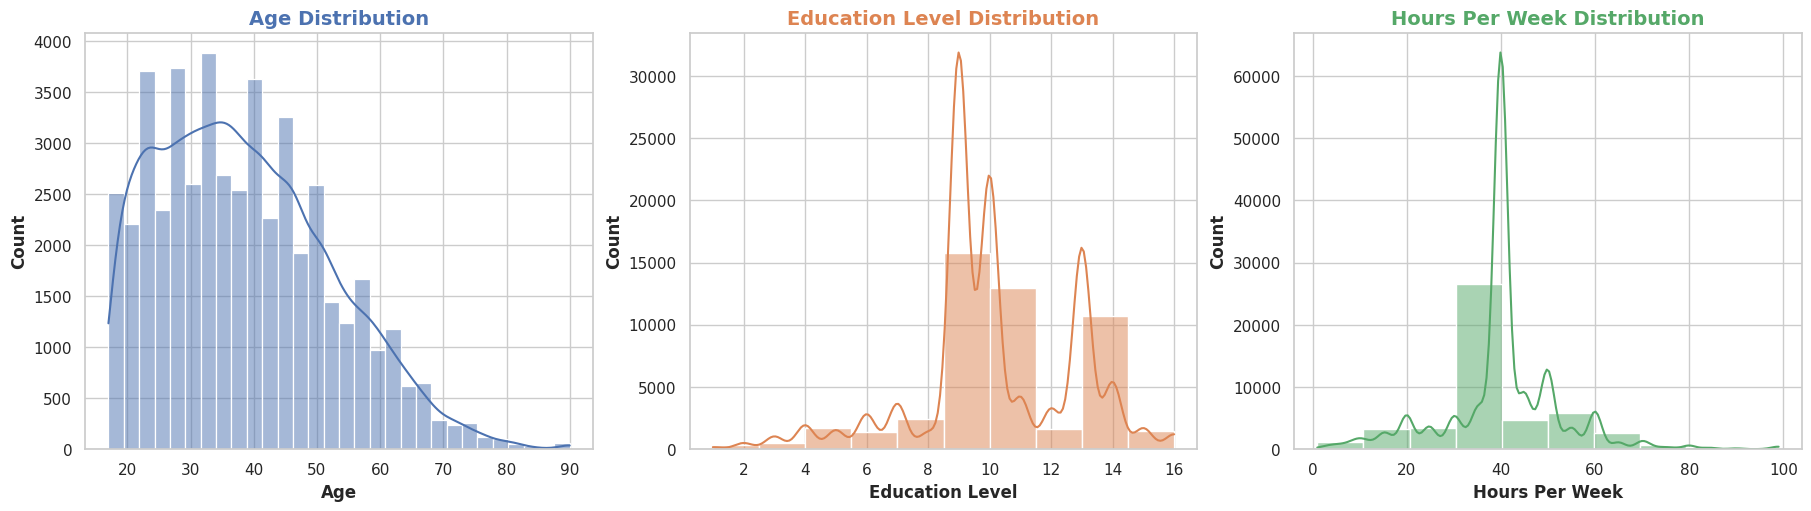

In [45]:
# Color palette for contrast and clarity
palette = ["#4C72B0", "#DD8452", "#55A868"]

sns.set_style("whitegrid")  # Ensures contrast and readability

# Subplots with improved figure size and spacing
fig, axes = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)

# Histogram for Age Distribution
sns.histplot(data['age'], bins=30, kde=True, color=palette[0], ax=axes[0])
axes[0].set_title('Age Distribution', fontsize=14, fontweight="bold", color=palette[0])
axes[0].set_xlabel("Age", fontsize=12, fontweight="bold")
axes[0].set_ylabel("Count", fontsize=12, fontweight="bold")

# Histogram for Education Level Distribution
sns.histplot(data['education_num'], bins=10, kde=True, color=palette[1], ax=axes[1])
axes[1].set_title('Education Level Distribution', fontsize=14, fontweight="bold", color=palette[1])
axes[1].set_xlabel("Education Level", fontsize=12, fontweight="bold")
axes[1].set_ylabel("Count", fontsize=12, fontweight="bold")

# Histogram for Hours Per Week Distribution
sns.histplot(data['hours_per_week'], bins=10, kde=True, color=palette[2], ax=axes[2])
axes[2].set_title('Hours Per Week Distribution', fontsize=14, fontweight="bold", color=palette[2])
axes[2].set_xlabel("Hours Per Week", fontsize=12, fontweight="bold")
axes[2].set_ylabel("Count", fontsize=12, fontweight="bold")

plt.savefig('Age_Distribution.png', dpi=300, bbox_inches='tight')
plt.savefig('Education_Level_Distribution.png', dpi=300, bbox_inches='tight')
plt.savefig('Hours_Per_Week_Distribution.png', dpi=300, bbox_inches='tight')

# Display the final visualization
plt.show()

**Age Distribution**

The Age Distribution histogram shows the frequency of individuals across different age groups. The highest count (30,000) is observed around ages 30-40, indicating a larger population in this range. Counts decrease steadily for ages 50 and above, with the lowest count (0) at age 90. This suggests a younger working-age population dominates the dataset, with fewer individuals in older age groups. The concentration of individuals aged 30-40 suggests a potential lack of representation for older age groups, impacting diversity and inclusion. This may reflect workplace biases or barriers for older employees, limiting equitable opportunities across generations.


**Education Level Distribution**

The histogram shows the frequency of individuals across education levels. The highest count (16) is observed at lower education levels, decreasing as education levels increase. This indicates a larger population with basic education and fewer individuals with advanced degrees. Higher counts at lower education levels may indicate systemic barriers to equity in access to advanced education. This could perpetuate income and opportunity gaps, disproportionately affecting underrepresented groups with limited access to higher education.


**Hours Per Week Distribution**

The histogram displays the frequency of working hours per week. The highest count (14) is around 40 hours, reflecting a standard full-time workweek. Counts decrease for both fewer and more hours, suggesting most individuals work around 40 hours, with fewer working part-time or overtime. The peak at 40 hours suggests rigid work structures, potentially excluding those needing flexible schedules (e.g., caregivers, students). This lack of inclusion may disadvantage marginalized groups, reinforcing inequities in workforce participation and work-life balance.


<ipython-input-46-0a73257a9af8>:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=30, ha='right')  # Rotate x-axis labels


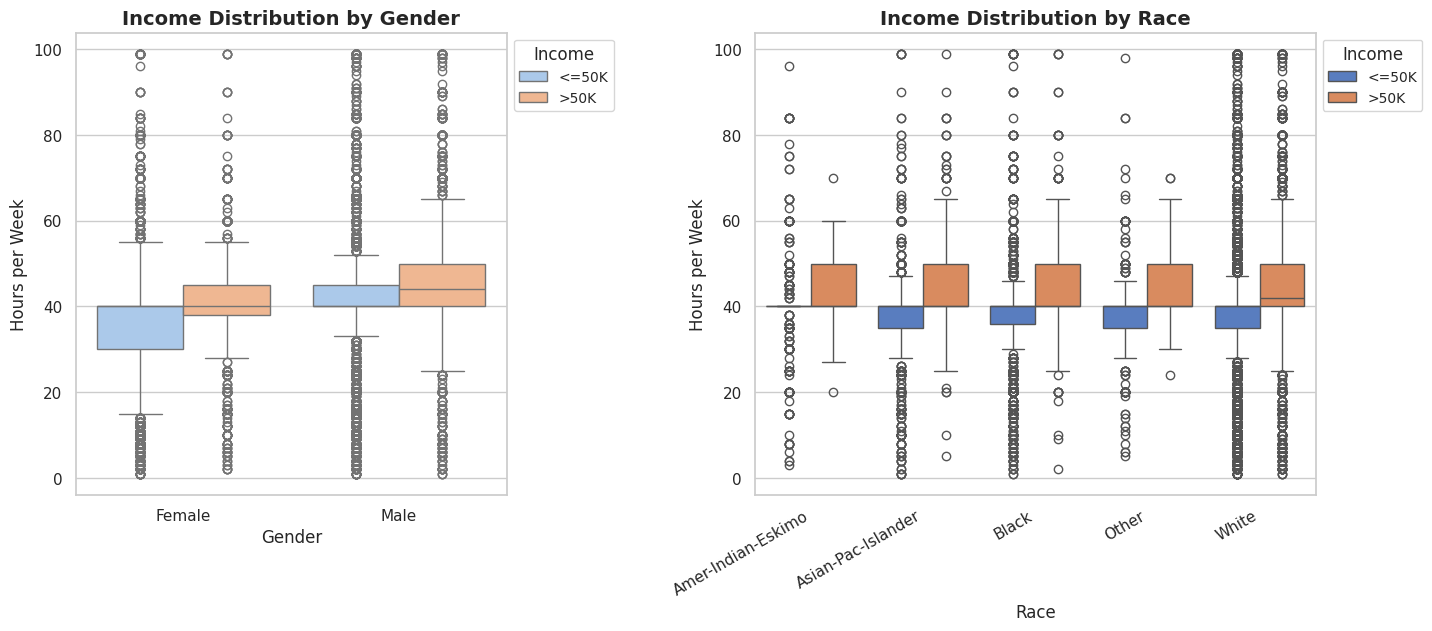

In [46]:
# Set seaborn style for readability
sns.set_style("whitegrid")

# Define figure size and spacing for better layout
fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1, 1.3]})

# Gender vs Income Distribution
sns.boxplot(x='sex', y='hours_per_week', hue='income', data=data, ax=axes[0], palette="pastel")
axes[0].set_title('Income Distribution by Gender', fontsize=14, fontweight="bold")
axes[0].set_xlabel('Gender', fontsize=12)
axes[0].set_ylabel('Hours per Week', fontsize=12)

# Move legend outside the plot area
legend_gender = axes[0].legend(title="Income", fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

# Race vs Income Distribution
sns.boxplot(x='race', y='hours_per_week', hue='income', data=data, ax=axes[1], palette="muted")
axes[1].set_title('Income Distribution by Race', fontsize=14, fontweight="bold")
axes[1].set_xlabel('Race', fontsize=12)
axes[1].set_ylabel('Hours per Week', fontsize=12)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=30, ha='right')  # Rotate x-axis labels

# Move legend outside the plot area
legend_race = axes[1].legend(title="Income", fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

# Improve alignment and spacing
plt.subplots_adjust(wspace=0.5, hspace=0.3)

# Show updated visualization
plt.show()

**Income Distribution by Gender:**

The graph shows income levels (<=50K and >50K) across genders. Females have a higher proportion in the <=50K category, while males dominate the >50K category. This indicates a gender pay gap, with females earning less than males. The data reveals gender inequity, with females disproportionately represented in lower income brackets. This reflects systemic biases in pay and opportunities, highlighting the need for policies to promote gender equity and close the pay gap.


**Income Distribution by Race:**

The graph displays income levels (<=50K and >50K) across racial groups. Certain racial groups are overrepresented in the <=50K category, while others dominate the >50K category, indicating racial disparities in income. The data shows racial inequity, with some groups facing systemic barriers to higher earnings. This underscores the need for inclusive policies to address racial pay disparities and ensure equitable opportunities for all.



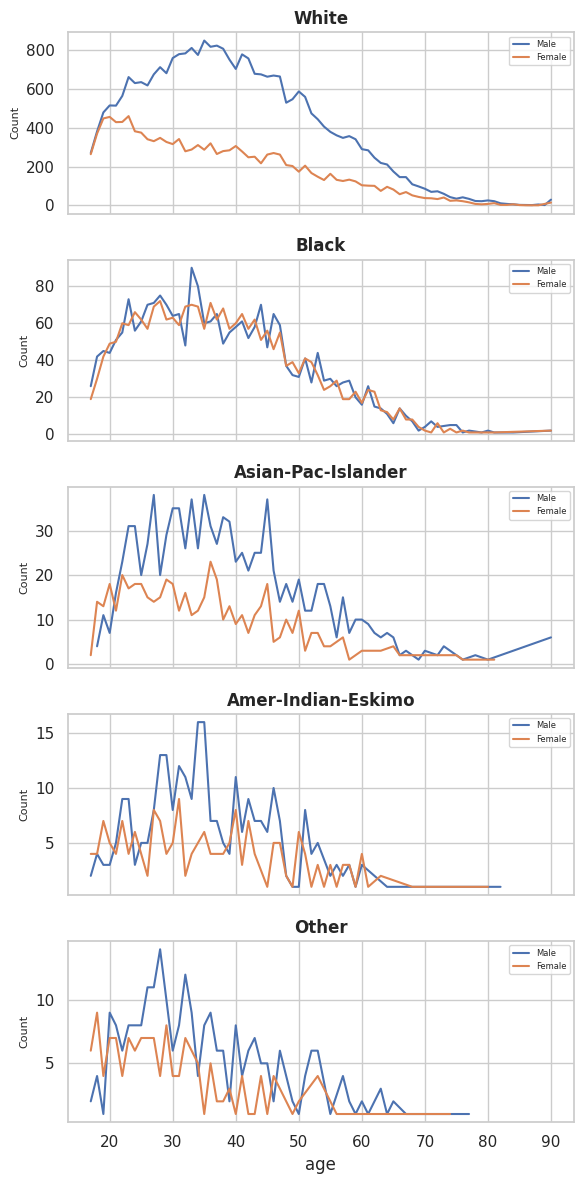

In [47]:
fig, axes = plt.subplots(len(data['race'].unique()), 1, figsize=(6, 12), sharex=True)

# Get unique values from the 'race' column to iterate
races = data['race'].unique()

for i, race in enumerate(races):
    # Assuming 'sex' column exists and has unique values
    sexes = data['sex'].unique()  # Get unique values from the 'sex' column
    for gender in sexes:
        gender_data = data[(data['sex'] == gender) & (data['race'] == race)] # Filter by both sex and race
        # Count the occurrences of each age for the given gender and race
        age_counts = gender_data['age'].value_counts().sort_index()
        axes[i].plot(age_counts.index, age_counts.values, label=gender)  # Plot age vs count

    axes[i].set_title(race, fontweight='bold')  # Bold the title
    axes[i].set_ylabel('Count', fontsize=8)
    axes[i].legend(fontsize=6)
    axes[i].yaxis.set_major_formatter('{x:.0f}') # Remove decimals

# Set x-axis label for the last subplot
axes[-1].set_xlabel('age')

plt.tight_layout()

plt.show()

**White:**

The graph shows income distribution for the White racial group, split by gender (male and female). Males dominate the >50K category, while females are more prevalent in the <=50K category, indicating a gender pay gap within this racial group. The data reveals gender inequity among Whites, with females earning less than males. This highlights the need for gender equity initiatives alongside racial equity efforts to address intersecting disparities.

**Black:**

The graph displays income distribution for the Black racial group, split by gender. Both males and females are predominantly in the <=50K category, but males slightly outnumber females in the >50K category, showing a gender pay gap. Blacks face racial and gender inequities, with females disproportionately in lower income brackets. Addressing these intersecting barriers is essential for promoting inclusion and equity.

**Asian-Pac-Islander:**

The graph illustrates income distribution for the Asian-Pac-Islander group, split by gender. Males dominate the >50K category, while females are more evenly distributed, indicating a gender pay gap within this group. Despite higher earnings for some, gender disparities persist among Asians. This calls for targeted efforts to address inequities and ensure inclusion for all genders.

**Amer-Indian-Eskimo:**

The graph shows income distribution for the Amer-Indian-Eskimo group, split by gender. Both genders are predominantly in the <=50K category, with males slightly more represented in the >50K category, reflecting a gender pay gap. This group faces racial and gender inequities, with systemic barriers limiting economic opportunities. Addressing these disparities is crucial for fostering diversity and belonging in the workforce.


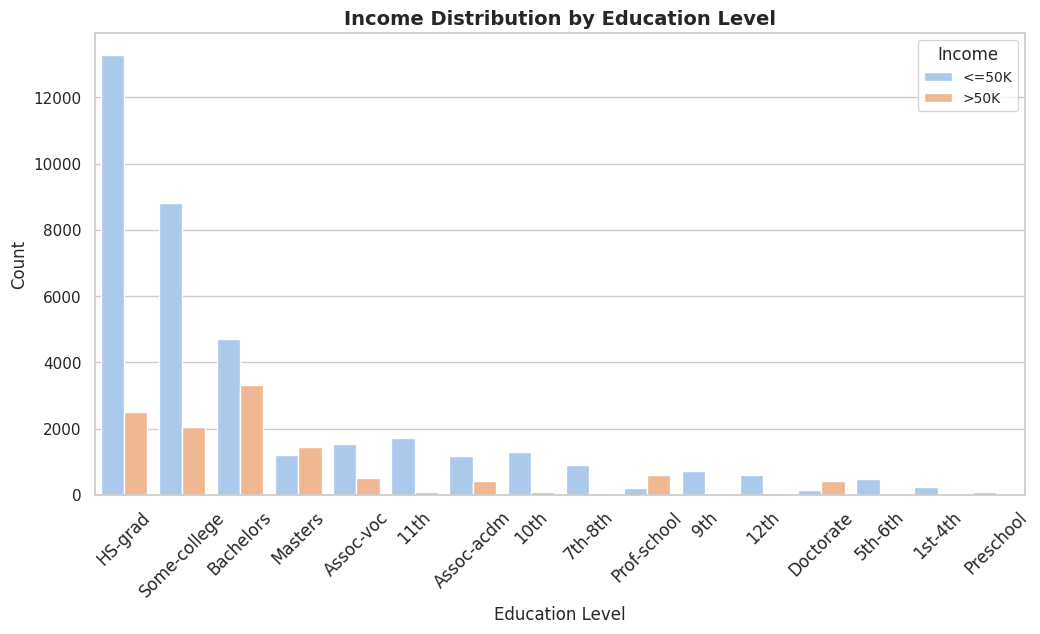

In [48]:
sns.set_style("whitegrid")

# Income by Education Level
plt.figure(figsize=(12, 6))
sns.countplot(x='education', hue='income', data=data, order=data['education'].value_counts().index, palette="pastel")
plt.xticks(rotation=45, fontsize=12)
plt.title('Income Distribution by Education Level', fontsize=14, fontweight="bold")
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title="Income", fontsize=10)
plt.show()

**Income by Education Level**

The bar chart displays income distribution by education level, showing that most individuals have a high school diploma or some college education. Higher-income earners (>50K, in orange) are more concentrated in bachelor's, master's, and doctorate levels. Those with only a high school degree or lower education have a higher proportion in the ≤50K category. This graph highlights education-based income disparity, where higher degrees correlate with greater financial success. Limited access to higher education disproportionately affects marginalized communities, reinforcing systemic barriers to economic mobility, workplace diversity, and leadership representation in professional fields. Expanding affordable education is crucial.

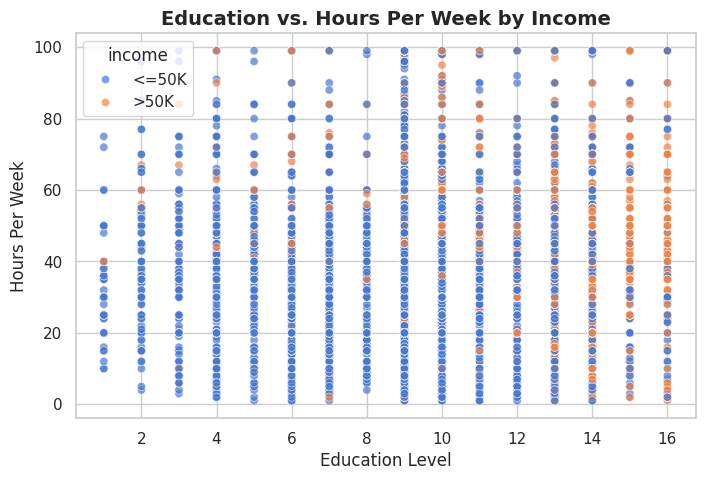

In [49]:
# Scatterplot: Education vs. Income
plt.figure(figsize=(8, 5))
sns.scatterplot(x='education_num', y='hours_per_week', hue='income', data=data, palette="muted", alpha=0.7)
plt.title('Education vs. Hours Per Week by Income', fontsize=14, fontweight="bold")
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Hours Per Week', fontsize=12)
legend_race = axes[1].legend(title="Income", fontsize=10, loc='upper right', bbox_to_anchor=(1, 1))
plt.show()

**Income by Education and Hours Worked**

The scatterplot illustrates the relationship between education level, hours worked per week, and income category (<=50K in blue, >50K in orange). Higher education levels are positively associated with an increased proportion of high-income earners. Most individuals, regardless of education, work between 35-50 hours per week. Those earning >50K are more concentrated at higher education levels (14-16 years), whereas individuals with lower education levels (≤6 years) predominantly fall in the ≤50K income group. There is no strong relationship between working longer hours and higher income, indicating education plays a larger role in income determination than hours worked.

**Social Implications**

The graph highlights income disparity based on education, where individuals with less access to higher education are less likely to earn above 50K. Promoting equitable education opportunities is essential for reducing wage inequality and ensuring greater economic mobility across all social groups.

<ipython-input-50-ce1cd1370fa9>:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = data.pivot_table(index='sex', columns='race', values='income', aggfunc=lambda x: (x == '>50K').mean())


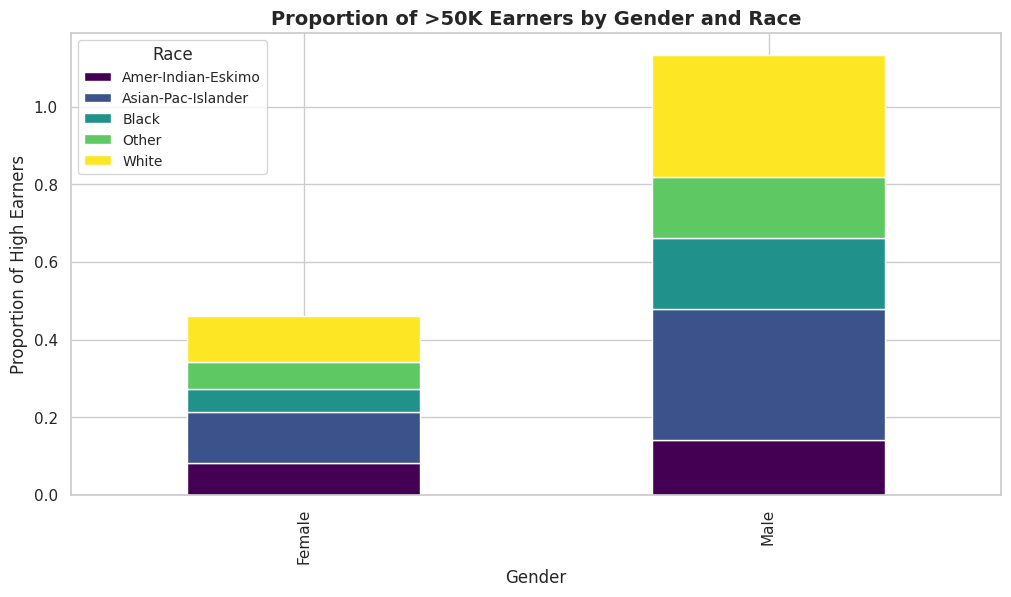

In [50]:
sns.set_style("whitegrid")

# Pivot Table & Bar Chart: Income by Gender & Race
pivot_table = data.pivot_table(index='sex', columns='race', values='income', aggfunc=lambda x: (x == '>50K').mean())
pivot_table.plot(kind='bar', figsize=(12, 6), stacked=True, colormap="viridis")
plt.title('Proportion of >50K Earners by Gender and Race', fontsize=14, fontweight="bold")
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Proportion of High Earners', fontsize=12)
plt.legend(title="Race", fontsize=10)
plt.show()

**Income by Gender and Race Ratio**

The stacked bar chart compares the proportion of earners making more than $50K across gender and race. Males have a significantly higher proportion of high earners compared to females. Among racial groups, White and Asian-Pacific Islander individuals make up the largest share of high-income earners, while Black and Amer-Indian-Eskimo groups represent the smallest share. The income disparity is more pronounced among males, where high earners are more concentrated. For females, the proportion of high earners is lower across all races. The gender wage gap and racial differences are clearly visible, indicating different income distribution patterns among groups.

**Social Implications**

The chart highlights income disparities based on gender and race, reflecting systemic barriers to high earnings for women and marginalized racial groups. Addressing pay equity, inclusive hiring, and leadership opportunities is essential to fostering diversity, equity, inclusion, and belonging (DEIB) in workplaces.

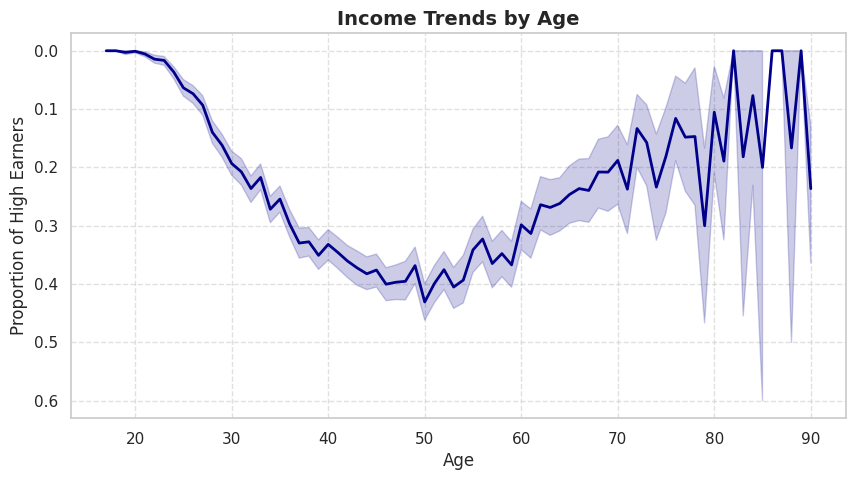

In [51]:
sns.set_style("whitegrid")

# Line Chart: Income Trends by Age
plt.figure(figsize=(10, 5))
sns.lineplot(x='age', y=data['income'].apply(lambda x: 1 if x == '>50K' else 0), data=data, color="darkblue", linewidth=2)
plt.title('Income Trends by Age', fontsize=14, fontweight="bold")
plt.xlabel('Age', fontsize=12)
plt.ylabel('Proportion of High Earners', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)  # Enhance contrast with grid lines
plt.show()

**Income Trends by Age**

The line graph represents income trends by age, showing the proportion of individuals earning more than $50K. The trend declines sharply from early 20s to mid-40s, reaching the lowest proportion around ages 45-50. After this point, the proportion of high earners gradually increases until age 70, with fluctuations beyond this age. The confidence interval (shaded area) widens significantly after age 70, indicating greater variability in income levels among older individuals. The instability in earnings after age 80+ suggests that income distribution becomes less predictable, likely due to retirement or changes in employment patterns.

**Social Implications**

This graph highlights age-based income inequality, where mid-career professionals (40s-50s) face a dip in high earnings. The wage recovery post-50 may reflect experienced professionals advancing into leadership roles. Addressing age discrimination and income stability is critical for inclusive workforce policies.

<Axes: >

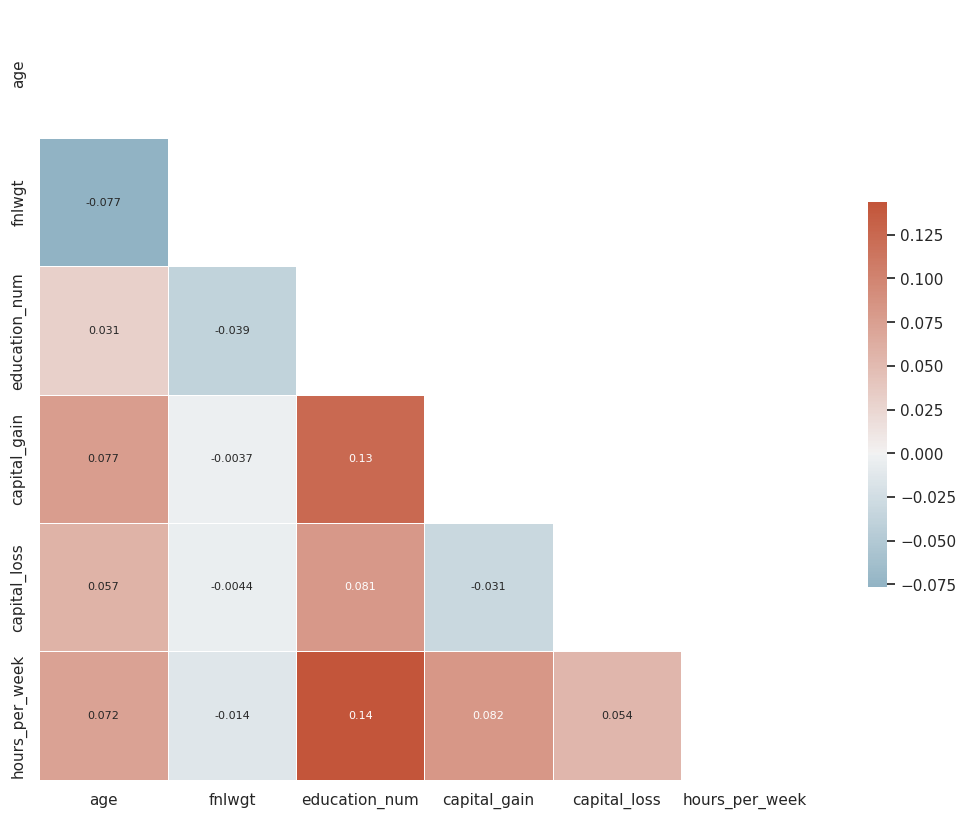

In [52]:
# First, select only numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
df_numeric = data[numeric_cols]

# Set the theme
sns.set_theme(style="white")

# Compute the correlation matrix using only numeric columns
# Changed 'data_numeric' to 'df_numeric'
corr = df_numeric.corr()

# Generate a mask for the upper triangle (otherwise this looks like the square we had above and is redundant)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap (choose colors here)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"fontsize":8})


**The Correlation Matrix**

The correlation heatmap highlights four key relationships. Education level and hours worked per week (0.14) show a weak positive correlation, suggesting higher education leads to slightly longer work hours. A stronger link exists between education level and capital gain (0.13), indicating that higher education correlates with greater financial gains, likely due to better job opportunities and investment access.

Similarly, hours worked per week and capital gain (0.14) suggest a slight increase in financial benefits with longer work hours, though other factors like job type play a bigger role. Lastly, education level and capital loss (0.081) suggest that individuals with more education may take greater financial risks, leading to occasional losses. While none of these correlations are strong, they highlight how education influences financial success more than work hours alone, reinforcing the importance of professional opportunities and investment knowledge in achieving long-term economic stability.

## Feature Selection

Thanks to our EDA and a general understanding of the features, we can identify some of the features that we could start with:

Age
Sex
ChestPainType
Cholesterol
FastingBS
We will also identify how stronly the feature columns are correlated to the target colummn. That should help us narrow down on the features.

In order to do that, we will first convert our categorical columns into dummy variables.

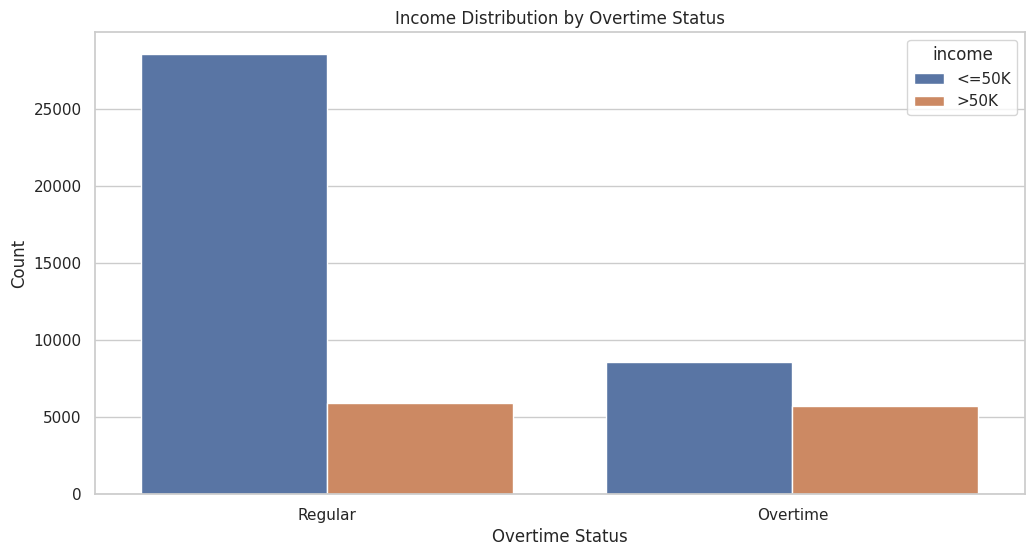

In [53]:
sns.set_style("whitegrid")

# Create 'overtime' feature
data['overtime'] = np.where(data['hours_per_week'] > 40, 'Overtime', 'Regular')

# Plot income distribution based on overtime
plt.figure(figsize=(12, 6))
sns.countplot(x='overtime', hue='income', data=data)
plt.title('Income Distribution by Overtime Status')
plt.xlabel('Overtime Status')
plt.ylabel('Count')
plt.show()


**Overtime Anlysis on Income Distribution**

The feature selection process introduced the "overtime" variable (>40 hours per week) to analyze how working longer hours impacts income distribution.
The bar chart illustrates income distribution based on overtime status. Employees working regular hours (≤40 hours per week) form the majority, with a significantly higher proportion earning ≤50K compared to those earning >50K. Those working overtime (>40 hours per week) show a higher proportion of high-income earners, but a large number still remain in the ≤50K category. This indicates that working overtime does not guarantee higher earnings, suggesting pay structure limitations or wage disparities in overtime compensation.

**Social Implications**

The graph highlights potential inequities in compensation structures, where employees working longer hours do not consistently achieve financial mobility. This could reflect systemic barriers, such as wage gaps, industry differences, or lack of overtime benefits. Addressing fair pay practices and equitable compensation policies is crucial to ensuring inclusive economic opportunities and work-life balance for all employees.


In [54]:
# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Get the correct name of the 'Higher Salary' column
higher_salary_column = [col for col in data_encoded.columns if 'Higher Salary' in col or '>50K' in col][0]

# Split data into features and target
X = data_encoded.drop(higher_salary_column, axis=1)
y = data_encoded[higher_salary_column]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Standardize numerical features
scaler = StandardScaler()
X_train[['age', 'capital_gain', 'capital_loss', 'hours_per_week']] = scaler.fit_transform(
    X_train[['age', 'capital_gain', 'capital_loss', 'hours_per_week']])
X_test[['age', 'capital_gain', 'capital_loss', 'hours_per_week']] = scaler.transform(
    X_test[['age', 'capital_gain', 'capital_loss', 'hours_per_week']])

X_train shape: (39073, 101)
X_test shape: (9769, 101)
y_train shape: (39073,)
y_test shape: (9769,)


##Logistic Regression

Regression model is applied to classify individuals based on whether they earn more than $50K or not. The model considers key factors such as age, capital gains, capital losses, and hours worked per week, along with categorical variables like education, occupation, and work sector to evaluate how these factors contribute to wage disparities and income classification.

In [55]:
# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Get the correct name of the 'Higher Salary' column
higher_salary_column = [col for col in data_encoded.columns if 'income' in col or '>50K' in col][0]

# Split data into features and target
X = data_encoded.drop(higher_salary_column, axis=1)
y = data_encoded[higher_salary_column]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
numeric_features = ['age', 'capital_gain', 'capital_loss', 'hours_per_week']
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

### Logistic Regression
logistic_model = LogisticRegression(max_iter=500, solver='saga', random_state=42, class_weight='balanced')
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Calculate accuracy
logistic_acc = accuracy_score(y_test, y_pred_logistic)
print(f"Logistic Regression Accuracy: {logistic_acc:.2f}")

Logistic Regression Accuracy: 0.76


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<Figure size 600x500 with 0 Axes>

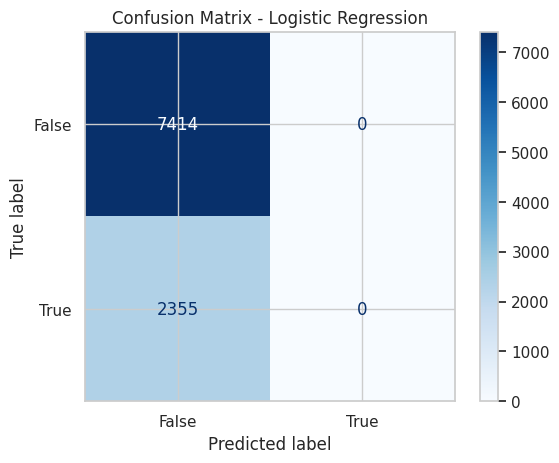


Logistic Regression Classification Report:
               precision    recall  f1-score   support

       False       0.76      1.00      0.86      7414
        True       0.00      0.00      0.00      2355

    accuracy                           0.76      9769
   macro avg       0.38      0.50      0.43      9769
weighted avg       0.58      0.76      0.65      9769



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [56]:
# Confusion Matrice for Model Comparison
plt.figure(figsize=(6, 5))
ConfusionMatrixDisplay.from_estimator(logistic_model, X_test, y_test, cmap='Blues', values_format='.0f')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Print classification report
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_logistic))

**Confusion Matrix**

The Logistic Regression model reveals a significant imbalance in classification performance. The model accurately predicts low-income individuals but entirely fails to classify high-income earners correctly. While it identifies 7,414 true negatives, it misclassifies 2,355 actual high-income individuals as low-income, leading to a high false negative rate. Notably, no true positives or false positives are recorded, indicating a complete inability to predict high-income cases. This suggests that the model is biased towards the majority class, likely due to an imbalance in the dataset or insufficient distinguishing features for higher income groups. As a result, the model underperforms in capturing income disparities and fails to provide meaningful insights for higher-income classification.


**Logistic Regression Classification Report**

The classification report for the Logistic Regression model highlights a significant imbalance in predictive performance. The model achieves an overall accuracy of 76%, but this is driven entirely by correctly predicting low-income individuals. The precision, recall, and F1-score for high-income earners are all 0.00, indicating a complete failure to identify individuals earning more than $50K. The macro average scores reflect poor balance, with a low F1-score of 0.43, suggesting the model does not generalize well across both income classes. This imbalance likely results from class skewness, necessitating adjustments such as class weighting, resampling, or alternative algorithms for better predictions.

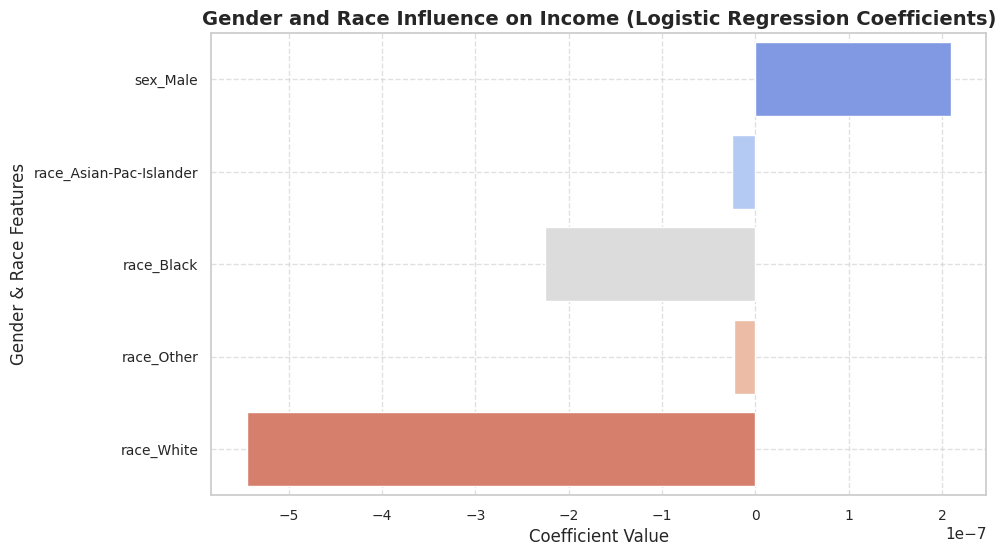

In [57]:
# Extract coefficients for gender and race features
gender_race_features = ['sex_Male', 'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White']
coefficients = model.coef_[0][X_train.columns.get_indexer(gender_race_features)]

# Create a DataFrame for feature importance
gender_race_feature_importance = pd.DataFrame({
    'Feature': gender_race_features,
    'Coefficient': coefficients
})

plt.figure(figsize=(10, 6))

# Correct way to use the color palette with seaborn's latest version
sns.barplot(
    data = gender_race_feature_importance,
    x="Coefficient",
    y="Feature",
    hue="Feature",  # Assign y variable to hue
    palette="coolwarm",
    legend=False  # Disable legend to avoid redundancy
)

plt.title("Gender and Race Influence on Income (Logistic Regression Coefficients)", fontsize=14, fontweight="bold")
plt.xlabel("Coefficient Value", fontsize=12)
plt.ylabel("Gender & Race Features", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add grid for better visibility
plt.grid(True, linestyle="--", alpha=0.6)

# Show updated visualization
plt.show()

The coefficient values indicate that being male is positively associated with earning more than $50K, while racial factors exhibit mixed impacts. White individuals have the strongest negative coefficient, suggesting a lower likelihood of being classified in the high-income group relative to the reference category. Black and Other racial groups also have negative coefficients, indicating potential systemic income disparities. Conversely, Asian-Pacific Islander individuals show a slight positive association with higher income. These results highlight existing demographic disparities in earnings, emphasizing the need for equitable workplace policies and inclusive hiring practices.









## Random Forest Model

The Random Forest model is applied to classify individuals based on income levels with encoding categorical variables and standardizing numerical features, including age, capital gain, capital loss, and hours worked per week. The data is split into training and testing sets to ensure the model generalizes well to new observations.

Random Forest Accuracy: 0.85


<Figure size 600x500 with 0 Axes>

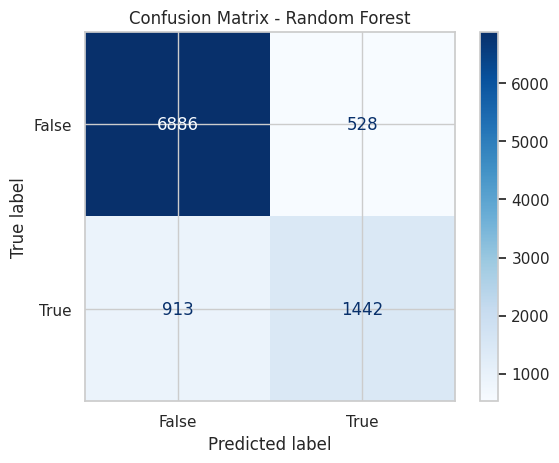


Random Forest Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.93      0.91      7414
        True       0.73      0.61      0.67      2355

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.85      0.85      9769



In [58]:
# Tree-Based Model (Random Forest)**
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_acc:.2f}")

# Matrice for Random Forest
plt.figure(figsize=(6, 5))
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap='Blues', values_format='.0f')
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Print classification report
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

## Random Forest Model

The model correctly classifies 6,886 low-income individuals while misclassifying 528 as high-income (false positives). Among high-income earners, 1,442 are correctly identified, while 913 are incorrectly classified as low-income (false negatives). Compared to logistic regression, this model significantly improves in identifying high-income individuals, reducing the false negative rate. The overall performance indicates a more balanced classification, though some misclassification persists. These results suggest that while Random Forest captures non-linear relationships better, further tuning, feature selection, or alternative ensemble techniques could enhance its predictive accuracy for income classification.


## Random Forest Classification Report

The overall accuracy is 85%, with precision of 88% for low-income individuals and 73% for high-income earners. The recall for high-income earners is 61%, significantly better than logistic regression, indicating the model correctly identifies more individuals in this category. The F1-score for high-income predictions is 0.67, reflecting a balance between precision and recall. The macro average scores show the model generalizes well across both classes. These results indicate that Random Forest provides a more reliable classification of income disparities, though further refinements could enhance performance for high-income predictions.